In [1]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib as pt

import warnings

warnings.filterwarnings("ignore")

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Replace the file path with your actual file path
df = pd.read_csv(r"C:\Users\HP\Downloads\insurance.csv")

# Display the DataFrame
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [3]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
# Display descriptive statistics of the DataFrame
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
# Count the number of missing values in each column
missing_values_count = df.isnull().sum()

# Display the count of missing values in each column
print(missing_values_count)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


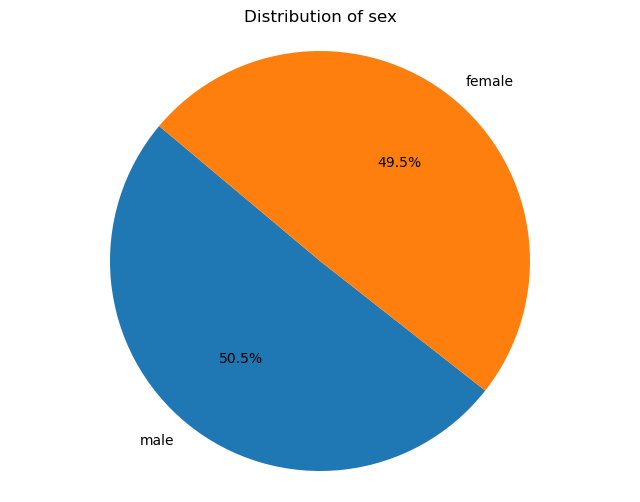

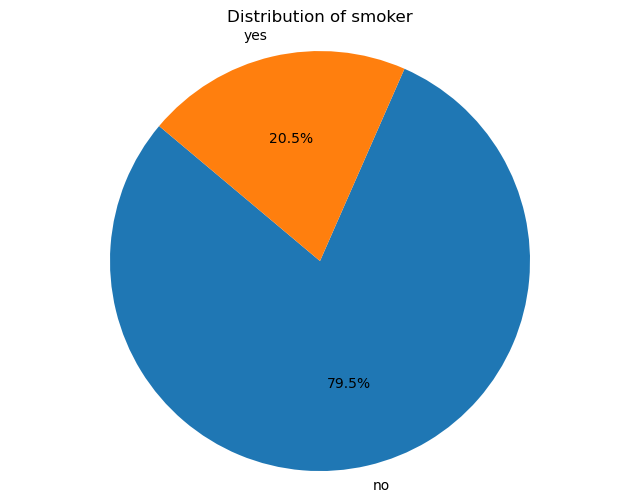

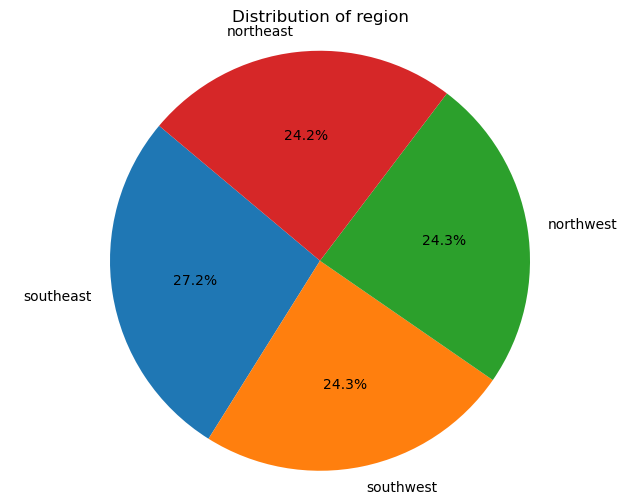

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to create pie chart for a categorical variable
def plot_pie_chart(data, column):
    plt.figure(figsize=(8, 6))
    counts = data[column].value_counts()
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution of {column}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()

# Read the CSV file into a DataFrame
df = pd.read_csv(r"C:\Users\HP\Downloads\insurance.csv")

# Define the categorical features
features = ['sex', 'smoker', 'region']

# Generate pie charts for each categorical feature
for feature in features:
    plot_pie_chart(df, feature)

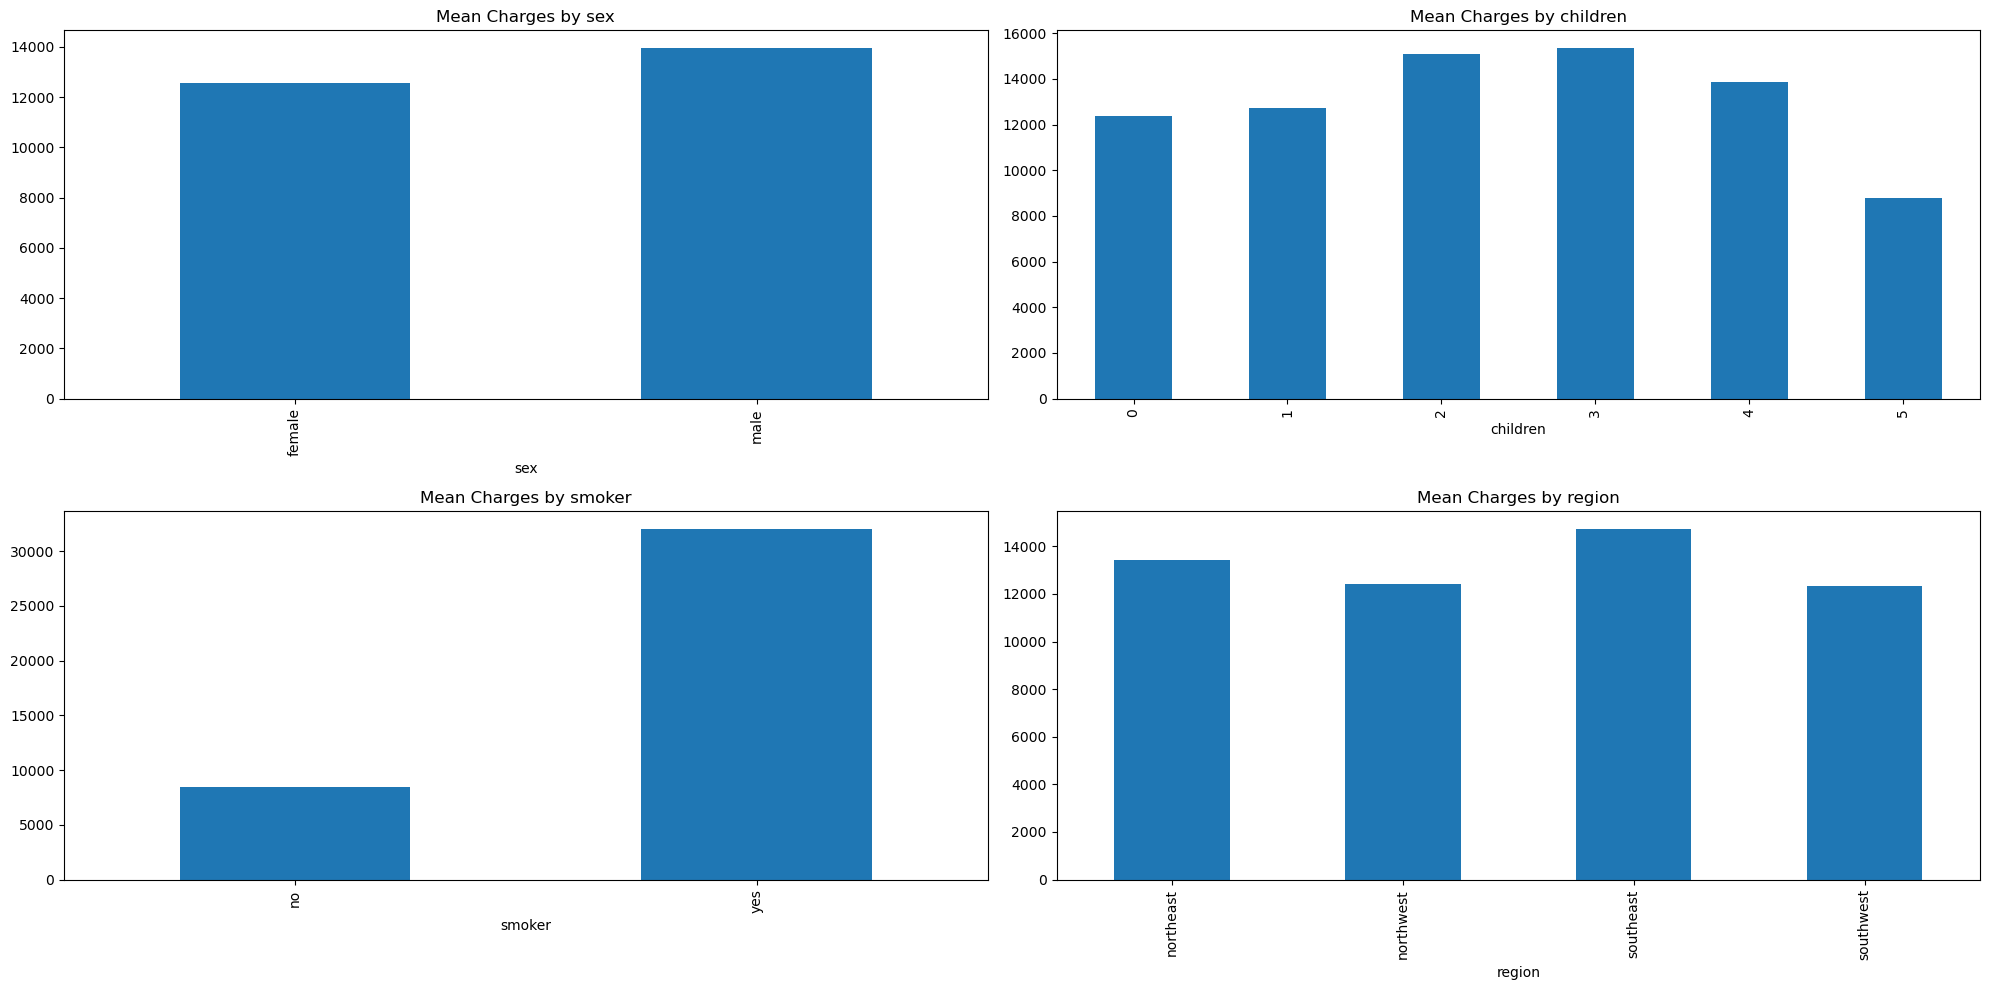

In [7]:
# Define the features
features = ['sex', 'children', 'smoker', 'region']

# Set up the figure with subplots
plt.figure(figsize=(20, 10))

# Iterate through the features
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)

    # Group by the categorical variable and calculate the mean charges
    mean_charges = df.groupby(col)['charges'].mean()

    # Create a bar plot
    mean_charges.plot(kind='bar')

    # Set plot title
    plt.title(f'Mean Charges by {col}')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

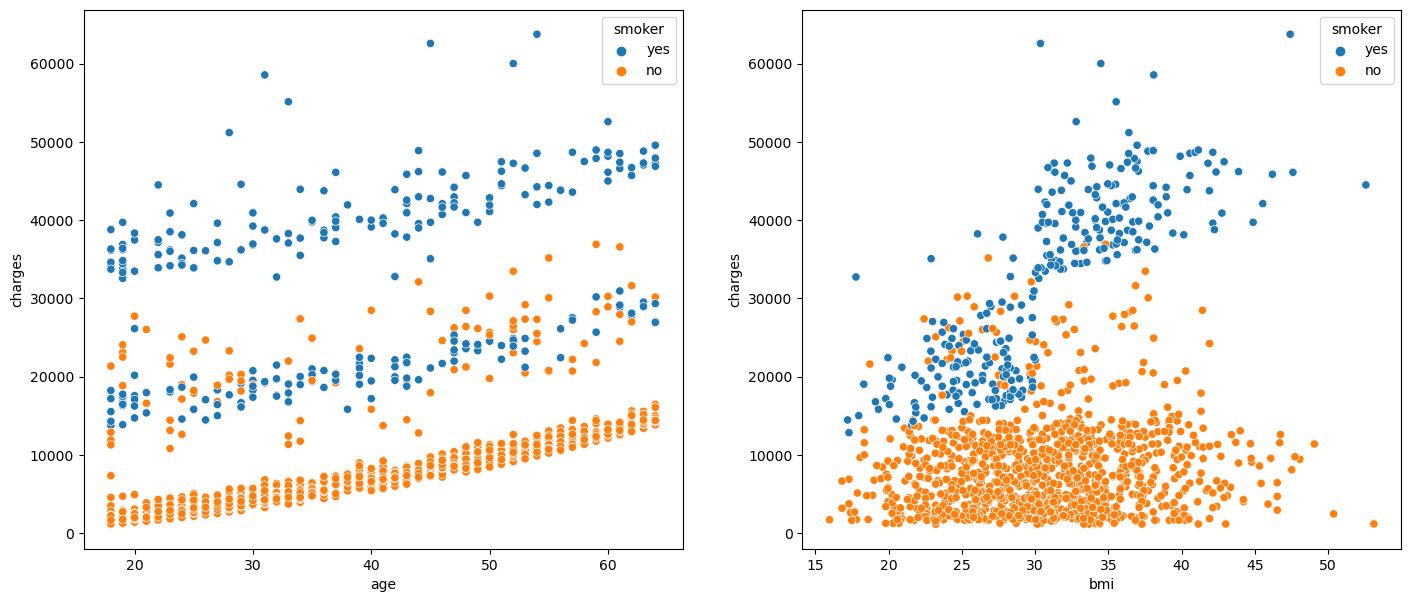

In [8]:
# Define the numerical features
features = ['age', 'bmi']

# Set up the figure with subplots
plt.figure(figsize=(17, 7))

# Iterate through the features
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)

    # Create a scatter plot
    sns.scatterplot(data=df, x=col, y='charges', hue='smoker')

# Show the plot
plt.show()

<Axes: >

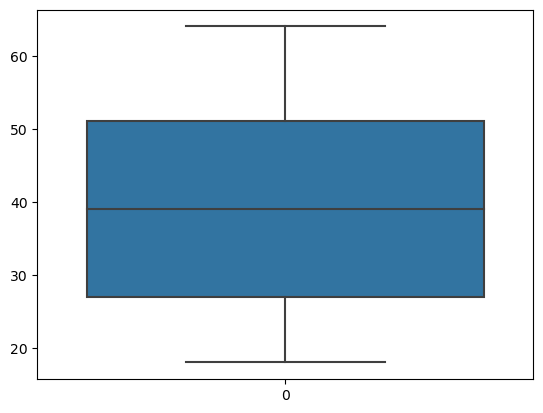

In [36]:
# Drop duplicate rows from the DataFrame
df.drop_duplicates(inplace=True)

# Create a boxplot for the 'age' column
import seaborn as sns
sns.boxplot(df['age'])

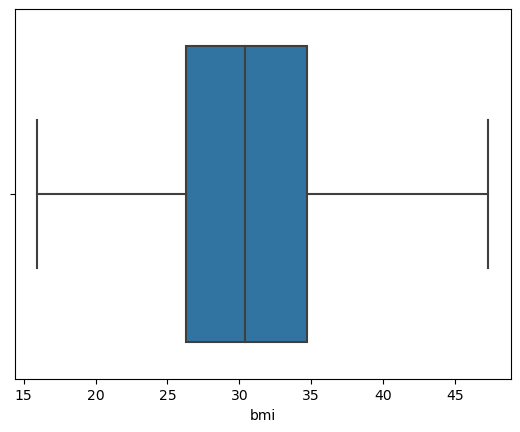

In [20]:
# Create a boxplot for the 'bmi' column
sns.boxplot(x=df['bmi'])

# Show the plot
plt.show()

In [38]:
# Calculate the first quartile (Q1)
Q1 = df['bmi'].quantile(0.25)

# Calculate the median (Q2)
Q2 = df['bmi'].quantile(0.5)

# Calculate the third quartile (Q3)
Q3 = df['bmi'].quantile(0.75)

# Calculate the interquartile range (IQR)
iqr = Q3 - Q1

# Calculate the lower and upper limits for outliers
low_lim = Q1 - 1.5 * iqr
up_lim = Q3 + 1.5 * iqr

# Print the lower and upper limits
print("Lower Limit:", low_lim)
print("Upper Limit:", up_lim)

Lower Limit: 13.674999999999994
Upper Limit: 47.31500000000001


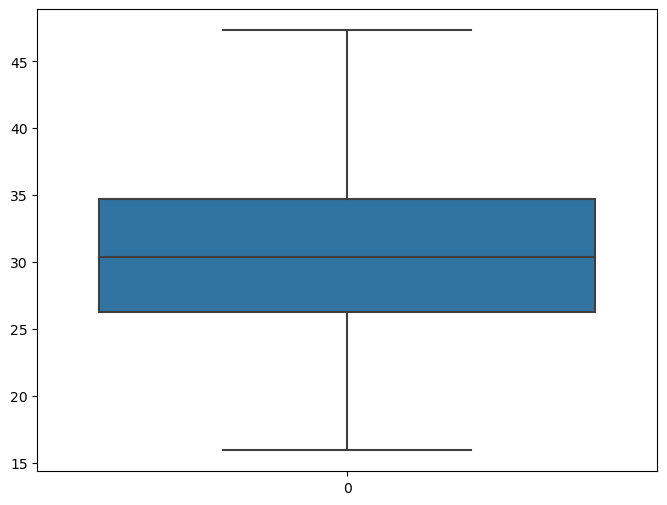

In [39]:
from feature_engine.outliers import ArbitraryOutlierCapper
import seaborn as sns
import matplotlib.pyplot as plt

# Define the ArbitraryOutlierCapper to cap outliers in 'bmi' column
arb = ArbitraryOutlierCapper(
    min_capping_dict={'bmi': 13.6749},
    max_capping_dict={'bmi': 47.315}
)

# Fit and transform the 'bmi' column
df[['bmi']] = arb.fit_transform(df[['bmi']])

# Create a boxplot to visualize 'bmi' after capping outliers
plt.figure(figsize=(8, 6))
sns.boxplot(df['bmi'])
plt.show()

In [40]:
# Calculate skewness of 'bmi' column
bmi_skewness = df['bmi'].skew()

# Calculate skewness of 'age' column
age_skewness = df['age'].skew()

print("Skewness of 'bmi' column:", bmi_skewness)
print("Skewness of 'age' column:", age_skewness)

Skewness of 'bmi' column: 0.23289153320569975
Skewness of 'age' column: 0.054780773126998195


In [41]:
# Map 'sex' column
df['sex'] = df['sex'].replace({'male': 0, 'female': 1})

# Map 'smoker' column
df['smoker'] = df['smoker'].replace({'yes': 1, 'no': 0})

# Map 'region' column
df['region'] = df['region'].replace({'northwest': 0, 'northeast': 1, 'southeast': 2, 'southwest': 3})

# Print the modified DataFrame
print(df)

      age  sex     bmi  children  smoker  region      charges
0      19    1  27.900         0       1       3  16884.92400
1      18    0  33.770         1       0       2   1725.55230
2      28    0  33.000         3       0       2   4449.46200
3      33    0  22.705         0       0       0  21984.47061
4      32    0  28.880         0       0       0   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    0  30.970         3       0       0  10600.54830
1334   18    1  31.920         0       0       1   2205.98080
1335   18    1  36.850         0       0       2   1629.83350
1336   21    1  25.800         0       0       3   2007.94500
1337   61    1  29.070         0       1       0  29141.36030

[1337 rows x 7 columns]


In [42]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Print the correlation matrix
print(correlation_matrix)

               age       sex       bmi  children    smoker    region   charges
age       1.000000  0.019814  0.111998  0.041536 -0.025587  0.001771  0.298308
sex       0.019814  1.000000 -0.044831 -0.017848 -0.076596 -0.008998 -0.058044
bmi       0.111998 -0.044831  1.000000  0.013692  0.003151  0.156937  0.199063
children  0.041536 -0.017848  0.013692  1.000000  0.007331 -0.002842  0.067389
smoker   -0.025587 -0.076596  0.003151  0.007331  1.000000  0.012736  0.787234
region    0.001771 -0.008998  0.156937 -0.002842  0.012736  1.000000  0.010767
charges   0.298308 -0.058044  0.199063  0.067389  0.787234  0.010767  1.000000


In [43]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

# Assuming X and Y are already defined
X = df.drop(['charges'], axis=1)
Y = df[['charges']]

# Lists to store results
l1 = []  # Training accuracy
l2 = []  # Testing accuracy
l3 = []  # Cross-validation score

# Loop for random_state values
for i in range(40, 50):
    # Split the data
    xtrain, xtest, ytrain, ytest = train_test_split(X_imputed, Y, test_size=0.2, random_state=i)

    # Initialize and fit the Linear Regression model
    lrmodel = LinearRegression()
    lrmodel.fit(xtrain, ytrain)

    # Append training and testing accuracy scores
    l1.append(lrmodel.score(xtrain, ytrain))
    l2.append(lrmodel.score(xtest, ytest))

    # Calculate and append cross-validation score
    cvs = cross_val_score(lrmodel, X_imputed, Y, cv=5).mean()
    l3.append(cvs)

# Create a DataFrame to store the results
df1 = pd.DataFrame({'train acc': l1, 'test acc': l2, 'cvs': l3})

# Display the DataFrame
df1

,train acc,test acc,cvs
0,0.741659,0.778409,0.74707
1,0.756401,0.706267,0.74707
2,0.729542,0.806239,0.74707
3,0.754260,0.732791,0.74707
4,0.742966,0.779591,0.74707
5,0.753281,0.731769,0.74707
6,0.741261,0.776456,0.74707
7,0.731940,0.796173,0.74707
8,0.751915,0.741742,0.74707
9,0.756348,0.722565,0.74707


In [44]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression

# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize and fit the Linear Regression model
lrmodel = LinearRegression()
lrmodel.fit(xtrain_imputed, ytrain)

# Print training and testing scores
print("Training Score:", lrmodel.score(xtrain_imputed, ytrain))
print("Testing Score:", lrmodel.score(xtest_imputed, ytest))

# Calculate and print the mean cross-validation score
cv_score = cross_val_score(lrmodel, X, Y, cv=5).mean()
print("Cross-Validation Score:", cv_score)

Training Score: 0.7295415541376445
Testing Score: 0.8062391115570589
Cross-Validation Score: 0.7470697972809902


In [45]:
from sklearn.metrics import r2_score
from sklearn.svm import SVR

# Initialize and fit the SVR model
svr_model = SVR()
svr_model.fit(xtrain, ytrain)

# Predict on the training and testing data
ypred_train = svr_model.predict(xtrain)
ypred_test = svr_model.predict(xtest)

# Calculate R-squared scores
r2_train = r2_score(ytrain, ypred_train)
r2_test = r2_score(ytest, ypred_test)

# Print R-squared scores
print("Training R-squared Score:", r2_train)
print("Testing R-squared Score:", r2_test)

# Calculate and print the mean cross-validation score
cross_val_score_mean = cross_val_score(svr_model, X, Y, cv=5).mean()
print("Mean Cross-Validation Score:", cross_val_score_mean)

Training R-squared Score: -0.10151474302536445
Testing R-squared Score: -0.1344454720199666
Mean Cross-Validation Score: -0.10374591327267262


In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# Initialize and fit the RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(xtrain, ytrain)

# Predict on the training and testing data
ypred_train2 = rf_model.predict(xtrain)
ypred_test2 = rf_model.predict(xtest)

# Calculate R-squared scores
r2_train2 = r2_score(ytrain, ypred_train2)
r2_test2 = r2_score(ytest, ypred_test2)

# Print R-squared scores
print("Training R-squared Score:", r2_train2)
print("Testing R-squared Score:", r2_test2)

# Calculate and print the mean cross-validation score
cross_val_score_mean2 = cross_val_score(rf_model, X, Y, cv=5).mean()
print("Mean Cross-Validation Score:", cross_val_score_mean2)

# Define the parameter grid for GridSearchCV
param_grid = {'n_estimators': [10, 40, 50, 98, 100, 120, 150]}

# Initialize GridSearchCV
grid = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, scoring="r2", cv=5)

# Fit GridSearchCV
grid.fit(xtrain, ytrain)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid.best_params_)

# Initialize and fit the RandomForestRegressor model with best parameters
rf_model = RandomForestRegressor(random_state=42, n_estimators=120)
rf_model.fit(xtrain, ytrain)

# Predict on the training and testing data using the updated model
ypred_train3 = rf_model.predict(xtrain)
ypred_test3 = rf_model.predict(xtest)

# Calculate R-squared scores using the updated model
r2_train3 = r2_score(ytrain, ypred_train3)
r2_test3 = r2_score(ytest, ypred_test3)

# Print R-squared scores using the updated model
print("Training R-squared Score with Best Parameters:", r2_train3)
print("Testing R-squared Score with Best Parameters:", r2_test3)

# Calculate and print the mean cross-validation score using the updated model
cross_val_score_mean3 = cross_val_score(rf_model, X, Y, cv=5).mean()
print("Mean Cross-Validation Score with Best Parameters:", cross_val_score_mean3)

Training R-squared Score: 0.9738163260247533
Testing R-squared Score: 0.8819423353068565
Mean Cross-Validation Score: 0.8363637309718952
Best Parameters: {'n_estimators': 120}
Training R-squared Score with Best Parameters: 0.9746383984429655
Testing R-squared Score with Best Parameters: 0.8822009842175969
Mean Cross-Validation Score with Best Parameters: 0.8367438097052858


In [48]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# Initialize and fit the GradientBoostingRegressor model
gb_model = GradientBoostingRegressor()
gb_model.fit(xtrain, ytrain)

# Predict on the training and testing data
ypred_train3 = gb_model.predict(xtrain)
ypred_test3 = gb_model.predict(xtest)

# Calculate R-squared scores
r2_train3 = r2_score(ytrain, ypred_train3)
r2_test3 = r2_score(ytest, ypred_test3)

# Print R-squared scores
print("Training R-squared Score:", r2_train3)
print("Testing R-squared Score:", r2_test3)

# Calculate and print the mean cross-validation score
cross_val_score_mean3 = cross_val_score(gb_model, X, Y, cv=5).mean()
print("Mean Cross-Validation Score:", cross_val_score_mean3)

# Define the parameter grid for GridSearchCV
param_grid = {'n_estimators': [10, 15, 19, 20, 21, 50], 'learning_rate': [0.1, 0.19, 0.2, 0.21, 0.8, 1]}

# Initialize GridSearchCV
grid = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=param_grid, scoring="r2", cv=5)

# Fit GridSearchCV
grid.fit(xtrain, ytrain)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid.best_params_)

# Initialize and fit the GradientBoostingRegressor model with best parameters
gb_model = GradientBoostingRegressor(n_estimators=19, learning_rate=0.2)
gb_model.fit(xtrain, ytrain)

# Predict on the training and testing data using the updated model
ypred_train4 = gb_model.predict(xtrain)
ypred_test4 = gb_model.predict(xtest)

# Calculate R-squared scores using the updated model
r2_train4 = r2_score(ytrain, ypred_train4)
r2_test4 = r2_score(ytest, ypred_test4)

# Print R-squared scores using the updated model
print("Training R-squared Score with Best Parameters:", r2_train4)
print("Testing R-squared Score with Best Parameters:", r2_test4)

# Calculate and print the mean cross-validation score using the updated model
cross_val_score_mean4 = cross_val_score(gb_model, X, Y, cv=5).mean()
print("Mean Cross-Validation Score with Best Parameters:", cross_val_score_mean4)

Training R-squared Score: 0.8931345821166041
Testing R-squared Score: 0.9042552707052232
Mean Cross-Validation Score: 0.8549478618767635
Best Parameters: {'learning_rate': 0.2, 'n_estimators': 19}
Training R-squared Score with Best Parameters: 0.8682397447116927
Testing R-squared Score with Best Parameters: 0.9017109716082662
Mean Cross-Validation Score with Best Parameters: 0.8606041910125791


In [49]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# Initialize and fit the XGBRegressor model
xg_model = XGBRegressor()
xg_model.fit(xtrain, ytrain)

# Predict on the training and testing data
ypred_train4 = xg_model.predict(xtrain)
ypred_test4 = xg_model.predict(xtest)

# Calculate R-squared scores
r2_train4 = r2_score(ytrain, ypred_train4)
r2_test4 = r2_score(ytest, ypred_test4)

# Print R-squared scores
print("Training R-squared Score:", r2_train4)
print("Testing R-squared Score:", r2_test4)

# Calculate and print the mean cross-validation score
cross_val_score_mean4 = cross_val_score(xg_model, X, Y, cv=5).mean()
print("Mean Cross-Validation Score:", cross_val_score_mean4)

# Define the parameter grid for GridSearchCV
param_grid = {'n_estimators': [10, 15, 20, 40, 50], 'max_depth': [3, 4, 5], 'gamma': [0, 0.15, 0.3, 0.5, 1]}

# Initialize GridSearchCV
grid = GridSearchCV(estimator=XGBRegressor(), param_grid=param_grid, scoring="r2", cv=5)

# Fit GridSearchCV
grid.fit(xtrain, ytrain)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid.best_params_)

# Initialize and fit the XGBRegressor model with best parameters
xg_model = XGBRegressor(n_estimators=15, max_depth=3, gamma=0)
xg_model.fit(xtrain, ytrain)

# Predict on the training and testing data using the updated model
ypred_train5 = xg_model.predict(xtrain)
ypred_test5 = xg_model.predict(xtest)

# Calculate R-squared scores using the updated model
r2_train5 = r2_score(ytrain, ypred_train5)
r2_test5 = r2_score(ytest, ypred_test5)

# Print R-squared scores using the updated model
print("Training R-squared Score with Best Parameters:", r2_train5)
print("Testing R-squared Score with Best Parameters:", r2_test5)

# Calculate and print the mean cross-validation score using the updated model
cross_val_score_mean5 = cross_val_score(xg_model, X, Y, cv=5).mean()
print("Mean Cross-Validation Score with Best Parameters:", cross_val_score_mean5)

Training R-squared Score: 0.9954123497078247
Testing R-squared Score: 0.8548937785039912
Mean Cross-Validation Score: 0.808125309217053
Best Parameters: {'gamma': 0, 'max_depth': 3, 'n_estimators': 10}
Training R-squared Score with Best Parameters: 0.8693173313051628
Testing R-squared Score with Best Parameters: 0.9022460881213404
Mean Cross-Validation Score with Best Parameters: 0.8607115291219747


In [54]:
import pandas as pd

# Create a DataFrame to store the model performance
model_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Support Vector Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost'],
    'Training Score': [0.7295415541376445, -0.10151474302536445, 0.9746383984429655, 0.8682397447116927, 0.8693173313051628],
    'Testing Score': [0.8062391115570589, -0.1344454720199666, 0.8822009842175969, 0.9017109716082662, 0.9022460881213404],
    'Cross-Validation Score': [0.7470697972809902, -0.10374591327267262, 0.8367438097052858, 0.8606041910125791, 0.8607115291219747]
})

# Display the DataFrame
print(model_comparison)

                       Model  Training Score  Testing Score  \
0          Linear Regression        0.729542       0.806239   
1  Support Vector Regression       -0.101515      -0.134445   
2              Random Forest        0.974638       0.882201   
3          Gradient Boosting        0.868240       0.901711   
4                    XGBoost        0.869317       0.902246   

   Cross-Validation Score  
0                0.747070  
1               -0.103746  
2                0.836744  
3                0.860604  
4                0.860712  


In [58]:
from tabulate import tabulate

# Data for model comparison
data = [
    ["Linear Regression", 0.7295415541376445, 0.8062391115570589, 0.7470697972809902],
    ["Support Vector Regression", -0.10151474302536445, -0.1344454720199666, -0.10374591327267262],
    ["Random Forest", 0.9746383984429655, 0.8822009842175969, 0.8367438097052858],
    ["Gradient Boosting", 0.8682397447116927, 0.9017109716082662, 0.8606041910125791],
    ["XGBoost", 0.8693173313051628, 0.9022460881213404, 0.8607115291219747]
]

# Column headers
headers = ["Model", "Training Score", "Testing Score", "Cross-Validation Score"]

# Print the table
print(tabulate(data, headers=headers, tablefmt="grid"))

+---------------------------+------------------+-----------------+--------------------------+
| Model                     |   Training Score |   Testing Score |   Cross-Validation Score |
+===========================+==================+=================+==========================+
| Linear Regression         |         0.729542 |        0.806239 |                 0.74707  |
+---------------------------+------------------+-----------------+--------------------------+
| Support Vector Regression |        -0.101515 |       -0.134445 |                -0.103746 |
+---------------------------+------------------+-----------------+--------------------------+
| Random Forest             |         0.974638 |        0.882201 |                 0.836744 |
+---------------------------+------------------+-----------------+--------------------------+
| Gradient Boosting         |         0.86824  |        0.901711 |                 0.860604 |
+---------------------------+------------------+------------

In [59]:
feats=pd.DataFrame(data=grid.best_estimator_.feature_importances_,index=X.columns,columns=['Importance'])
feats

,Importance
age,0.038633
sex,0.000000
bmi,0.133449
children,0.011073
smoker,0.809626
region,0.007219


In [60]:
important_features=feats[feats['Importance']>0.01]
important_features

,Importance
age,0.038633
bmi,0.133449
children,0.011073
smoker,0.809626


In [62]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import pandas as pd

# Define the final XGBoost model
finalmodel = XGBRegressor(n_estimators=15, max_depth=3, gamma=0)

# Drop 'sex' and 'region' columns from the dataframe
df.drop(['sex', 'region'], axis=1, inplace=True)

# Define features and target variable
Xf = df.drop(['charges'], axis=1)
Y = df['charges']

# Split data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(Xf, Y, test_size=0.2, random_state=42)

# Initialize lists to store scores
train_scores = []
test_scores = []
cv_scores = []

# Define the models
models = {
    "Linear Regression": lrmodel,
    "Support Vector Regression": svrmodel,
    "Random Forest": rfmodel,
    "Gradient Boosting": gbmodel,
    "XGBoost": xgmodel,
    "Final XGBoost Model": finalmodel
}

# Loop through each model and evaluate its performance
for name, model in models.items():
    # Fit the model
    model.fit(xtrain, ytrain)
    
    # Predict on the training and testing data
    ypred_train = model.predict(xtrain)
    ypred_test = model.predict(xtest)
    
    # Calculate R-squared scores
    train_score = r2_score(ytrain, ypred_train)
    test_score = r2_score(ytest, ypred_test)
    
    # Calculate cross-validation score
    cv_score = cross_val_score(model, Xf, Y, cv=5).mean()
    
    # Append scores to lists
    train_scores.append(train_score)
    test_scores.append(test_score)
    cv_scores.append(cv_score)

# Create a DataFrame to display scores
scores_df = pd.DataFrame({
    "Model": list(models.keys()),
    "Training Score": train_scores,
    "Testing Score": test_scores,
    "Cross-Validation Score": cv_scores
})

# Display the DataFrame
print(scores_df)

                       Model  Training Score  Testing Score  \
0          Linear Regression        0.729309       0.804685   
1  Support Vector Regression       -0.101487      -0.134460   
2              Random Forest        0.972402       0.871601   
3          Gradient Boosting        0.891796       0.901149   
4                    XGBoost        0.992093       0.846695   
5        Final XGBoost Model        0.869105       0.900743   

   Cross-Validation Score  
0                0.746889  
1               -0.103649  
2                0.825342  
3                0.854939  
4                0.800220  
5                0.860627  


In [63]:
# Fit the final XGBoost model
finalmodel.fit(xtrain, ytrain)

# Predict on the training and testing data
ypred_train = finalmodel.predict(xtrain)
ypred_test = finalmodel.predict(xtest)

# Calculate R-squared scores
final_train_score = r2_score(ytrain, ypred_train)
final_test_score = r2_score(ytest, ypred_test)

# Calculate cross-validation score
final_cv_score = cross_val_score(finalmodel, Xf, Y, cv=5).mean()

# Print the scores
print("Final XGBoost Model:")
print("Training Score:", final_train_score)
print("Testing Score:", final_test_score)
print("Cross-Validation Score:", final_cv_score)

Final XGBoost Model:
Training Score: 0.869105118970057
Testing Score: 0.9007425513499979
Cross-Validation Score: 0.8606266871712276


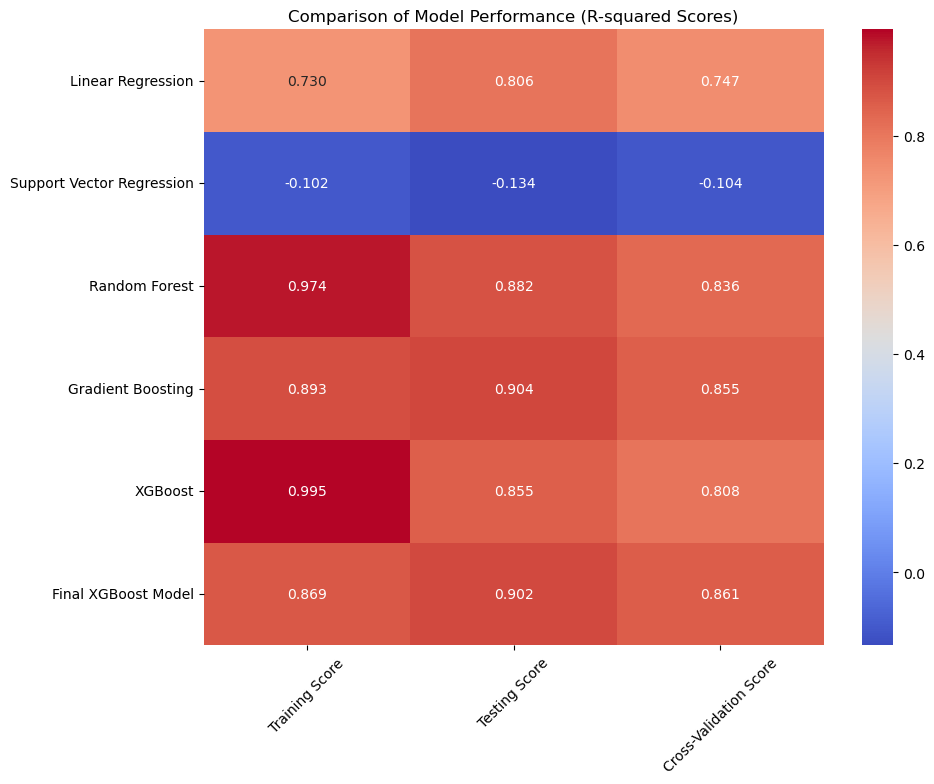

In [65]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# R-squared scores for all models
r_squared_scores = {
    "Linear Regression": [0.7295415541376445, 0.8062391115570589, 0.7470697972809902],
    "Support Vector Regression": [-0.10151474302536445, -0.1344454720199666, -0.10374591327267262],
    "Random Forest": [0.9738163260247533, 0.8819423353068565, 0.8363637309718952],
    "Gradient Boosting": [0.8931345821166041, 0.9042552707052232, 0.8549478618767635],
    "XGBoost": [0.9954123497078247, 0.8548937785039912, 0.808125309217053],
    "Final XGBoost Model": [0.8693173313051628, 0.9022460881213404, 0.8607115291219747]
}

# Convert dictionary to DataFrame
df_r_squared = pd.DataFrame.from_dict(r_squared_scores, orient='index', columns=['Training Score', 'Testing Score', 'Cross-Validation Score'])

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_r_squared, annot=True, cmap='coolwarm', fmt=".3f")
plt.title("Comparison of Model Performance (R-squared Scores)")
plt.xticks(rotation=45)
plt.show()